In [1]:
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/home/callum/Documents/data-flow/raw-to-nc/pyglider")
import pyglider.seaexplorer as seaexplorer
import pyglider.ncprocess as ncprocess
import pyglider.utils as pgutils
import logging
logging.basicConfig(level='WARNING')


In [2]:
rawdir  = '../sea46_m45_sub/'
rawncdir     = 'realtime_rawnc_ctd/'
deploymentyaml_ctd = 'ctd.yml'
l0tsdir    = 'L0_ctd/'

In [3]:
!ls ../sea46_m45_sub

sea046.45.gli.sub.10.gz  sea046.45.gli.sub.41.gz   sea046.45.pld1.raw.27.gz
sea046.45.gli.sub.11.gz  sea046.45.gli.sub.42.gz   sea046.45.pld1.raw.28.gz
sea046.45.gli.sub.12.gz  sea046.45.gli.sub.43.gz   sea046.45.pld1.raw.29.gz
sea046.45.gli.sub.13.gz  sea046.45.gli.sub.44.gz   sea046.45.pld1.raw.2.gz
sea046.45.gli.sub.14.gz  sea046.45.gli.sub.45.gz   sea046.45.pld1.raw.30.gz
sea046.45.gli.sub.15.gz  sea046.45.gli.sub.46.gz   sea046.45.pld1.raw.31.gz
sea046.45.gli.sub.16.gz  sea046.45.gli.sub.47.gz   sea046.45.pld1.raw.32.gz
sea046.45.gli.sub.17.gz  sea046.45.gli.sub.48.gz   sea046.45.pld1.raw.33.gz
sea046.45.gli.sub.18.gz  sea046.45.gli.sub.49.gz   sea046.45.pld1.raw.34.gz
sea046.45.gli.sub.19.gz  sea046.45.gli.sub.4.gz    sea046.45.pld1.raw.35.gz
sea046.45.gli.sub.1.gz	 sea046.45.gli.sub.50.gz   sea046.45.pld1.raw.36.gz
sea046.45.gli.sub.20.gz  sea046.45.gli.sub.5.gz    sea046.45.pld1.raw.37.gz
sea046.45.gli.sub.21.gz  sea046.45.gli.sub.6.gz    sea046.45.pld1.raw.38.gz
sea046.45.gli.

In [4]:
!rm -rf realtime_rawnc_ctd
seaexplorer.raw_to_rawnc(rawdir, rawncdir, deploymentyaml_ctd)
seaexplorer.merge_parquet(rawncdir, rawncdir, deploymentyaml_ctd, kind='raw')
nc_ctd = seaexplorer.raw_to_timeseries(rawncdir, l0tsdir, deploymentyaml_ctd, kind='raw')

In [5]:
rawncdir     = 'realtime_rawnc_keep/'
deploymentyaml_keep = 'keep.yml'
l0tsdir    = './L0_keep/'

In [6]:
!rm -rf realtime_rawnc_ctd
seaexplorer.raw_to_rawnc(rawdir, rawncdir, deploymentyaml_keep)
seaexplorer.merge_parquet(rawncdir, rawncdir, deploymentyaml_keep, kind='raw')
nc_keep = seaexplorer.raw_to_timeseries(rawncdir, l0tsdir, deploymentyaml_keep, kind='raw')

In [7]:
ds_ctd = xr.open_dataset(nc_ctd)
ds_keep = xr.open_dataset(nc_keep)

In [8]:
ds_ctd

<xarray.Dataset>
Dimensions:                (time: 137168)
Coordinates:
  * time                   (time) datetime64[ns] 2018-07-12T16:09:23.64199987...
    latitude               (time) float64 ...
    longitude              (time) float64 ...
    depth                  (time) float64 ...
Data variables: (12/30)
    nav_state              (time) float64 ...
    heading                (time) float64 ...
    pitch                  (time) float64 ...
    roll                   (time) float64 ...
    dive_num               (time) float64 ...
    security_level         (time) float64 ...
    ...                     ...
    profile_index          (time) float64 ...
    profile_direction      (time) float64 ...
    salinity               (time) float64 ...
    potential_density      (time) float64 ...
    density                (time) float64 ...
    potential_temperature  (time) float64 ...
Attributes: (12/57)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    cdm_data_type:             Trajectory
    comment:                   deployment and recovery in Bornholm. Metadata ...
    contributor_name:          Callum Rollo, Louise Biddle, Olle Petersson, A...
    contributor_role:          Data Processor, PI, Head of Operations, Glider...
    ...                        ...
    summary:                    Part of NS_Bornholm continuous monitoring
    time_coverage_end:         2020-09-10T02:50:55.289000000
    time_coverage_start:       2018-07-12T16:09:23.642000000
    title:                     unknown46-20180712T1609
    transmission_system:       IRIDIUM
    wmo_id:                    0

In [9]:
ds_keep

<xarray.Dataset>
Dimensions:                (time: 4874525)
Coordinates:
    latitude               (time) float64 ...
    longitude              (time) float64 ...
  * time                   (time) datetime64[ns] 2020-09-08T12:45:06.420000 ....
    depth                  (time) float64 ...
Data variables: (12/30)
    nav_state              (time) float64 ...
    heading                (time) float64 ...
    pitch                  (time) float64 ...
    roll                   (time) float64 ...
    dive_num               (time) float64 ...
    security_level         (time) float64 ...
    ...                     ...
    profile_index          (time) float64 ...
    profile_direction      (time) float64 ...
    salinity               (time) float64 ...
    potential_density      (time) float64 ...
    density                (time) float64 ...
    potential_temperature  (time) float64 ...
Attributes: (12/57)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    cdm_data_type:             Trajectory
    comment:                   deployment and recovery in Bornholm. Metadata ...
    contributor_name:          Callum Rollo, Louise Biddle, Olle Petersson, A...
    contributor_role:          Data Processor, PI, Head of Operations, Glider...
    ...                        ...
    summary:                    Part of NS_Bornholm continuous monitoring
    time_coverage_end:         2020-09-10T02:50:56.226000000
    time_coverage_start:       2020-09-08T12:45:06.420000000
    title:                     unknown46-20200908T1245
    transmission_system:       IRIDIUM
    wmo_id:                    0

In [13]:
print(f"CTD samples in ctd normalised {sum(~np.isnan(ds_ctd.temperature).values)}, in keep vars {sum(~np.isnan(ds_keep.temperature).values)}")

CTD samples in ctd normalised 137168, in keep vars 136677


In [14]:
print(f"Oxygen samples in ctd normalised {sum(~np.isnan(ds_ctd.oxygen_concentration).values)}, in keep vars {sum(~np.isnan(ds_keep.oxygen_concentration).values)}")

Oxygen samples in ctd normalised 59630, in keep vars 4797251


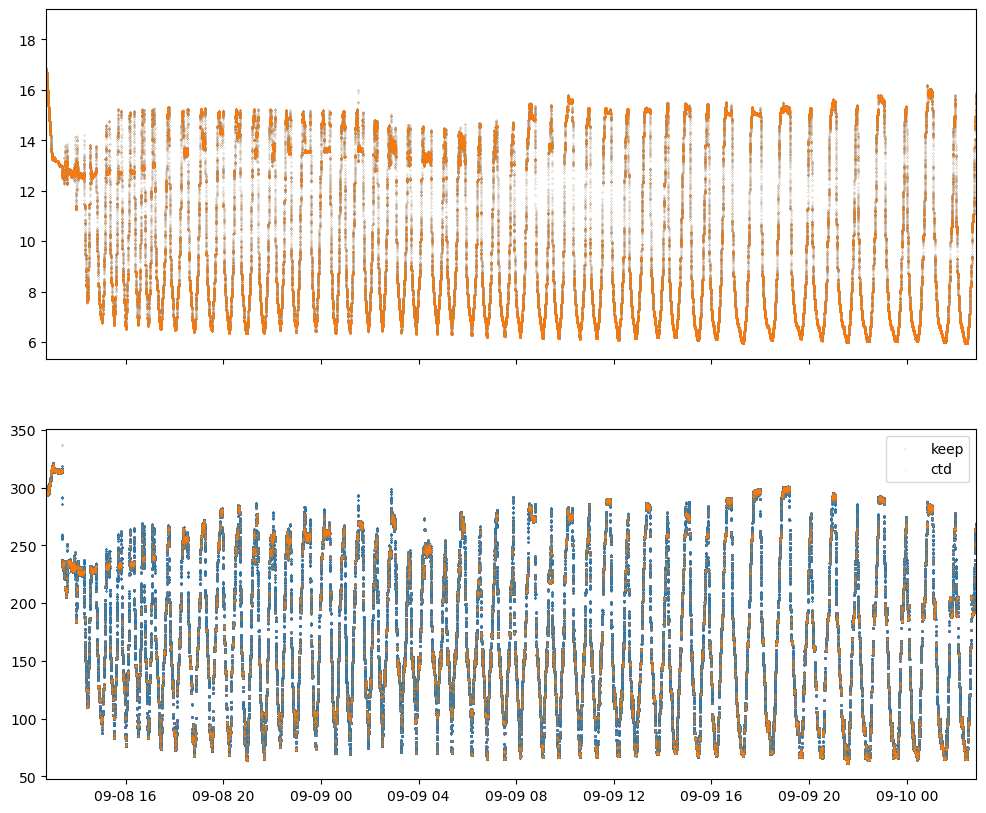

In [12]:
fig, ax = plt.subplots(2,1, sharex="col", figsize=(12,10))
ax = ax.ravel()
ax[0].scatter(ds_keep.time, ds_keep.temperature, label="keep", s=0.01)

ax[0].scatter(ds_ctd.time, ds_ctd.temperature, label="ctd", s=0.01)
ax[1].scatter(ds_keep.time, ds_keep.oxygen_concentration, label="keep", s=0.01)
ax[1].scatter(ds_ctd.time, ds_ctd.oxygen_concentration, label="ctd", s=0.01)
ax[1].set(xlim=(ds_ctd.time[500], ds_ctd.time[-1]));
ax[1].legend()